In [24]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import json
import osmnx as ox
import plotly.express as px

In [25]:
df = pd.read_excel('../data/raw/farm_site_boundary.xlsx')

In [26]:
def string_to_polygon(s):
    # Replace single quotes with double quotes for valid JSON format
    s = s.replace("'", '"')
    # Turn the string into a list of point dictionaries
    points_list = eval(s)
    # Create a Polygon object from the list of point dictionaries
    polygon = Polygon([(point['lng'], point['lat']) for point in points_list])
    return polygon

In [27]:
df['polygon_geometry'] = df['location_grid_points'].apply(string_to_polygon)
# df.head()

In [28]:
df['point_geometry'] = [Point(x, y) for x, y in zip(df['longitude'], df['latitude'])]
# df.head()

In [29]:
gdf = gpd.GeoDataFrame(df, geometry='point_geometry')
# gdf.head()

In [30]:
gdf['polygon_geometry'] = df['polygon_geometry']
gdf.head()

,farm_id,country_name,latitude,longitude,location_id,type,location_area_m2,location_grid_points,polygon_geometry,point_geometry
0,7a2e6fcc-ab78-11eb-a4ad-0242ac130002,Canada,49.059192,-122.882005,605c6008-ab7e-11eb-8a94-0242ac130002,farm_site_boundary,211908.0,"[{""lat"": 49.05928816695972, ""lng"": -122.883487...",POLYGON ((-122.88348775768395 49.0592881669597...,POINT (-122.88200 49.05919)
1,36322d78-b2ac-11eb-9edf-0242ac130002,Canada,49.036135,-122.713490,931eeb88-b2ad-11eb-b6ac-0242ac130002,farm_site_boundary,21388.0,"[{""lat"": 49.0361106915654, ""lng"": -122.7183954...",POLYGON ((-122.71839542729994 49.0361106915654...,POINT (-122.71349 49.03613)
2,dee27326-b2af-11eb-a871-0242ac130002,Canada,43.944641,-79.730420,607eb4a8-b2b0-11eb-b10e-0242ac130002,farm_site_boundary,211695.0,"[{""lat"": 43.94351188354036, ""lng"": -79.7265726...",POLYGON ((-79.72657263766844 43.94351188354036...,POINT (-79.73042 43.94464)
3,1e3b98f8-ca44-11eb-8062-0242ac130002,Canada,48.995126,-58.045602,5f708a3c-ca5c-11eb-a595-0242ac130002,farm_site_boundary,1047.0,"[{""lat"": 48.994851525201184, ""lng"": -58.045751...",POLYGON ((-58.04575132181069 48.99485152520118...,POINT (-58.04560 48.99513)
4,33851eae-dad5-11eb-9c2f-0242ac130002,Canada,46.636528,-71.042723,fcc4ed58-dad5-11eb-b818-0242ac130002,farm_site_boundary,52718.0,"[{""lat"": 46.63706792013167, ""lng"": -71.0435030...",POLYGON ((-71.04350309594241 46.63706792013167...,POINT (-71.04272 46.63653)


In [31]:
# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.crs = "EPSG:4326"

In [32]:
provinces = gpd.read_file("../data/raw/provinces")
provinces = provinces.to_crs("EPSG:4326") 
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((-57.40256 54.14965, -57.38429 ..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-61.98300 46.45775, -61.98136 ..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((-61.90233 45.87878, -61.90057 ..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-58.64703 51.20816, -58.63991 ..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((-88.86612 56.84777, -88.86838 ..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((-94.82341 59.99352, -94.82398 ..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((-109.63748 60.00005, -109.62498 60.0..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((-110.00000 59.95258, -110.00000 59.9..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-135.40000 60.00006, -135.3875..."


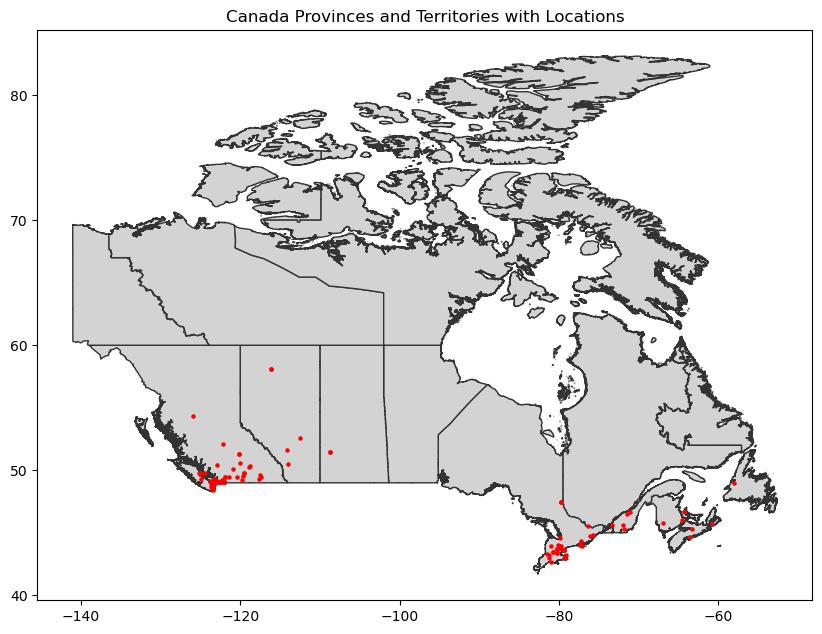

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the provinces first
provinces.plot(ax=ax, edgecolor="0.2", color='lightgrey')

# Plot the points from all farms
gdf.set_geometry('point_geometry', inplace=True)
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.title("Canada Provinces and Territories with Locations")
plt.show()

Text(35.972222222222214, 0.5, 'Latitude')

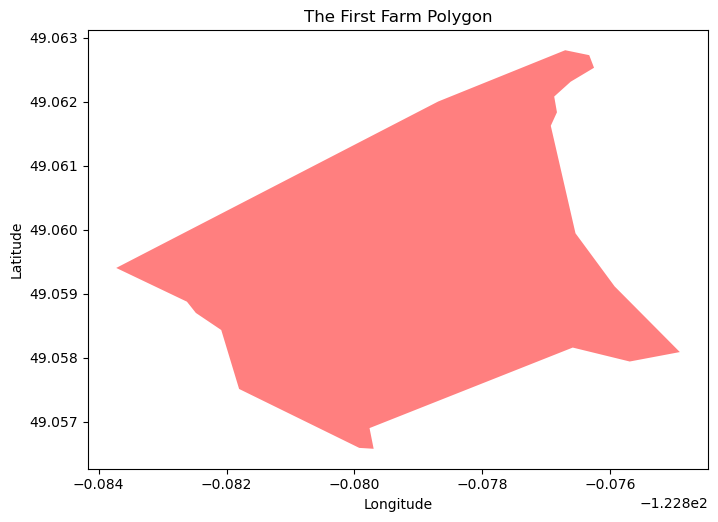

In [34]:
gdf.set_geometry('polygon_geometry', inplace=True)

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot only the first polygon
gdf.iloc[0:1].plot(ax=ax, color='red', alpha=0.5)

# Adding some labels and title for clarity
ax.set_title("The First Farm Polygon")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

In [35]:
province = "British Columbia"
bc = provinces.query("PRENAME == @province").copy()
bc = (bc.loc[:, ["PRENAME", "geometry"]]
        .rename(columns={"PRNAME": "Province"})
        .reset_index(drop=True)
      )

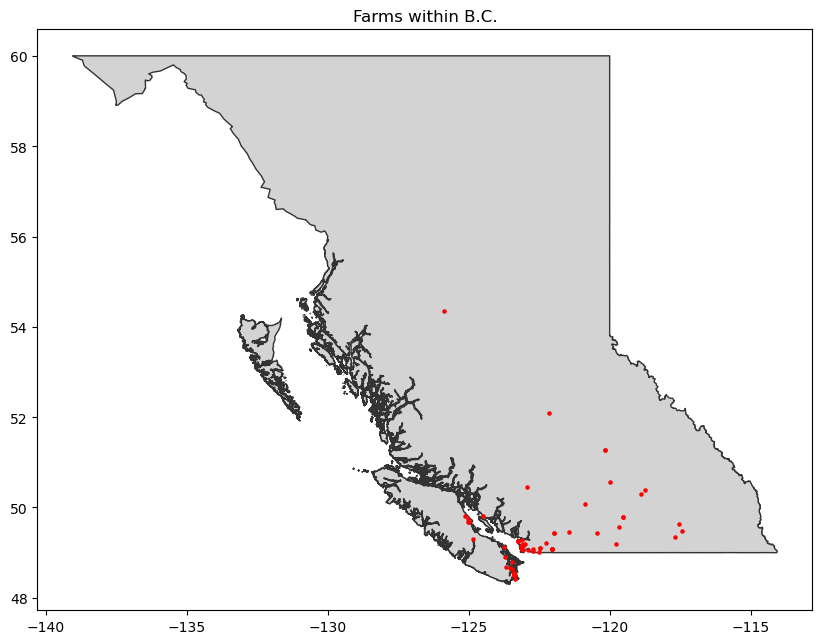

In [36]:
gdf.set_geometry('point_geometry', inplace=True)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the provinces first
bc.plot(ax=ax, edgecolor="0.2", color='lightgrey')

# Plot the points from all farms
farms_in_bc = gpd.sjoin(gdf, bc, predicate='within')
# farms_in_bc.set_geometry('point_geometry', inplace=True)
# farms_in_bc.crs = "EPSG:4326"
farms_in_bc.plot(ax=ax, marker='o', color='red', markersize=5)

plt.title("Farms within B.C.")
plt.show()

In [37]:
gdf_province = gpd.sjoin(gdf, provinces[["PRENAME", "geometry"]], how='left', predicate='intersects').drop(columns=['index_right'])
gdf_province.head()

,farm_id,country_name,latitude,longitude,location_id,type,location_area_m2,location_grid_points,polygon_geometry,point_geometry,PRENAME
0,7a2e6fcc-ab78-11eb-a4ad-0242ac130002,Canada,49.059192,-122.882005,605c6008-ab7e-11eb-8a94-0242ac130002,farm_site_boundary,211908.0,"[{""lat"": 49.05928816695972, ""lng"": -122.883487...","POLYGON ((-122.88349 49.05929, -122.88262 49.0...",POINT (-122.88200 49.05919),British Columbia
1,36322d78-b2ac-11eb-9edf-0242ac130002,Canada,49.036135,-122.713490,931eeb88-b2ad-11eb-b6ac-0242ac130002,farm_site_boundary,21388.0,"[{""lat"": 49.0361106915654, ""lng"": -122.7183954...","POLYGON ((-122.71840 49.03611, -122.71742 49.0...",POINT (-122.71349 49.03613),British Columbia
2,dee27326-b2af-11eb-a871-0242ac130002,Canada,43.944641,-79.730420,607eb4a8-b2b0-11eb-b10e-0242ac130002,farm_site_boundary,211695.0,"[{""lat"": 43.94351188354036, ""lng"": -79.7265726...","POLYGON ((-79.72657 43.94351, -79.73285 43.942...",POINT (-79.73042 43.94464),Ontario
3,1e3b98f8-ca44-11eb-8062-0242ac130002,Canada,48.995126,-58.045602,5f708a3c-ca5c-11eb-a595-0242ac130002,farm_site_boundary,1047.0,"[{""lat"": 48.994851525201184, ""lng"": -58.045751...","POLYGON ((-58.04575 48.99485, -58.04574 48.995...",POINT (-58.04560 48.99513),Newfoundland and Labrador
4,33851eae-dad5-11eb-9c2f-0242ac130002,Canada,46.636528,-71.042723,fcc4ed58-dad5-11eb-b818-0242ac130002,farm_site_boundary,52718.0,"[{""lat"": 46.63706792013167, ""lng"": -71.0435030...","POLYGON ((-71.04350 46.63707, -71.04100 46.636...",POINT (-71.04272 46.63653),Quebec


In [38]:
gdf_province["PRENAME"].unique()

array(['British Columbia', 'Ontario', 'Newfoundland and Labrador',
       'Quebec', 'Alberta', 'New Brunswick', 'Nova Scotia',
       'Saskatchewan', 'Prince Edward Island'], dtype=object)

In [39]:
gdf_province["PRENAME"].nunique()

9

In [40]:
location = "Vancouver Island"

In [41]:
city = ox.geocode_to_gdf(f"{location}, Canada")

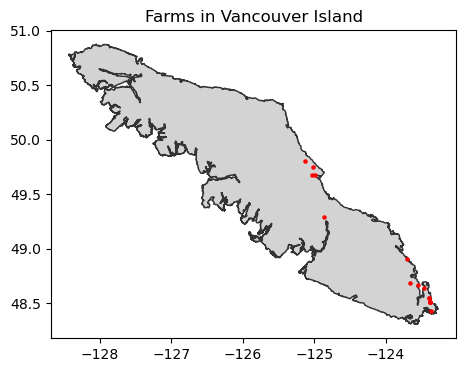

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the provinces first
city_bc = gpd.clip(bc, city)
city_bc.plot(ax=ax, edgecolor="0.2", color='lightgrey')

# Plot the points from all farms
farms_in_city = gpd.sjoin(gdf, city, predicate='within')
farms_in_city.set_geometry('point_geometry', inplace=True)
farms_in_city.plot(ax=ax, marker='o', color='red', markersize=5)

plt.title(f"Farms in {location}")
plt.show()

In [43]:
# selected_farm = farm_gdf[farm_gdf['farm_id'] == 'specific_id']

# now just hard code the selection
selected_farm = gdf_province.iloc[0:1]
selected_farm

,farm_id,country_name,latitude,longitude,location_id,type,location_area_m2,location_grid_points,polygon_geometry,point_geometry,PRENAME
0,7a2e6fcc-ab78-11eb-a4ad-0242ac130002,Canada,49.059192,-122.882005,605c6008-ab7e-11eb-8a94-0242ac130002,farm_site_boundary,211908.0,"[{""lat"": 49.05928816695972, ""lng"": -122.883487...","POLYGON ((-122.88349 49.05929, -122.88262 49.0...",POINT (-122.88200 49.05919),British Columbia


In [44]:
minx, miny, maxx, maxy = selected_farm.total_bounds

In [45]:
# from shapely.geometry import box

# margin = 0.001  # Adjust the margin

# expanded_bbox = box(minx - margin, miny - margin, maxx + margin, maxy + margin)

# # Extract bounds from the expanded_bbox
# west, south, east, north = expanded_bbox.bounds

# # Fetch the graph from the bounding box
# G = ox.graph_from_bbox(north, south, east, west, network_type='all')

# fig, ax = ox.plot_graph(G, show=False, close=False)
# selected_farm.plot(ax=ax, color='red', alpha=0.7)
# plt.show()

In [47]:
import folium

# Calculate the center of the farm
center_lat = (miny + maxy) / 2
center_lon = (minx + maxx) / 2

# Create a folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=17) 

for _, row in selected_farm.iterrows():
    poly = [[(lat, lon) for lon, lat in zip(*row['polygon_geometry'].exterior.coords.xy)]]
    folium.Polygon(locations=poly, color='red', weight=2, fill_color='red', fill_opacity=0.5).add_to(m)

# Show the map
m.save('../data/map.html')

In [54]:
fig = px.scatter_mapbox(selected_farm, lat="latitude", lon="longitude",
                        color_continuous_scale="RdYlGn_r",
                        mapbox_style="carto-positron",
                        center={"lat": selected_farm.loc[0, 'latitude'], 
                                "lon": selected_farm.loc[0, 'longitude']}, 
                        zoom=15)

In [55]:
polygon = selected_farm.loc[0, 'polygon_geometry']
x, y = polygon.exterior.xy
fig.add_trace(px.line_mapbox(lat=y, lon=x).data[0])

# Update layout and display the figure
fig.update_layout(margin=dict(l=0, r=0, t=10, b=10), width=700, height=500)
fig.show()